# Лабораторная работа №3 Березин А.А. М19-ЯЭ Вариант 1

### 1. Задание 1

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import re
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.datasets import fetch_20newsgroups, load_files
from sklearn.linear_model import Perceptron

import pandas as pd
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
m=pd.read_csv('mushrooms.csv')
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
m.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [4]:
m1=m.rename(columns={'class' : 'Класс', 'cap-shape' : 'Форма шляпки', 'cap-surface' : 'Поверхность шляпки', 'cap-color' : 'Цвет шляпки', 'bruises' : 'Пятна', 'odor' : 'Запах', 'gill-attachment' : 'Крепление жабр', 'gill-spacing' : 'Расстояние между жабр', 'gill-size' : 'Размер жабр', 'gill-color' : 'Цвет жабр', 'stalk-shape' : 'Форма стебля', 'stalk-root' : 'Корень ножки','stalk-surface-above-ring' : 'Поверхность ножки над кольцом','stalk-surface-below-ring' : 'Поверхность ножки под кольцом','stalk-color-above-ring' : 'Цвет ножки над кольцом', 'stalk-color-below-ring' : 'Цвет ножки под кольцом','veil-type' : 'Тип покрывальца','veil-color' : 'Цвет покрывальца','ring-number' : 'Номер кольца','ring-type' : 'Тип кольца','spore-print-color' : 'Цвет спор','population' : 'Популяция', 'habitat' : 'Среда обитания'})

In [5]:
m1.head()

,Класс,Форма шляпки,Поверхность шляпки,Цвет шляпки,Пятна,Запах,Крепление жабр,Расстояние между жабр,Размер жабр,Цвет жабр,...,Поверхность ножки под кольцом,Цвет ножки над кольцом,Цвет ножки под кольцом,Тип покрывальца,Цвет покрывальца,Номер кольца,Тип кольца,Цвет спор,Популяция,Среда обитания
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
k=m.nunique().to_frame(1)
k.head(100)


,1
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [7]:
print(sum(k[1]))

119


<AxesSubplot:>

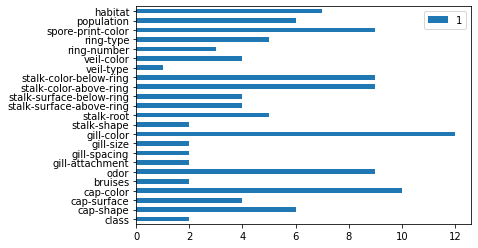

In [8]:
k.plot.barh()

<AxesSubplot:>

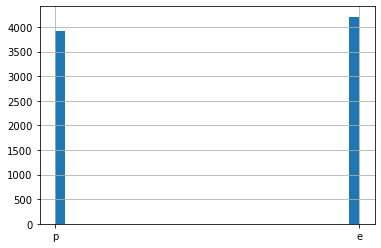

In [9]:
m['class'].hist(bins=30)

### 
- classes: edible=e, poisonous=p

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- bruises: bruises=t,no=f

- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- gill-attachment: attached=a,descending=d,free=f,notched=n

- gill-spacing: close=c,crowded=w,distant=d

- gill-size: broad=b,narrow=n

- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- stalk-shape: enlarging=e,tapering=t

- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- veil-type: partial=p,universal=u

- veil-color: brown=n,orange=o,white=w,yellow=y

- ring-number: none=n,one=o,two=t

- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [10]:
del m['veil-type']

### 2. Задание 2

In [11]:
m.size

178728

In [12]:
m.shape

(8124, 22)

In [13]:
m.drop_duplicates(keep=False)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


In [14]:
m.duplicated().sort_values(0)

0       False
5423    False
5422    False
5421    False
5420    False
        ...  
2701    False
2700    False
2699    False
2712    False
8123    False
Length: 8124, dtype: bool

### 3. Задание 3

In [15]:
m.value_counts().to_frame()

0
class cap-shape cap-surface cap-color bruises odor gill-attachment gill-spacing gill-size gill-color stalk-shape stalk-root stalk-surface-above-ring stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring veil-color ring-number ring-type spore-print-color population habitat   
p     x         y           y         f       n    f               c            n         w          e           ?          k                        y                        w                      y                      w          o           e         w                 v          d        1
e     x         f           n         f       n    f               w            b         n          t           e          s                        f                        w                      w                      w          o           e         k                 a          g        1
                                                                                          k          t           e          s                        f                        w                      w                      w          o           e         n                 s          g        1
                                                                                                                                                     s                        w                      w                      w          o           e         k                 a          g        1
                                                                                                                                                                                                                                                                               s          g        1
...                                                                                                                                                                                                                                                                                               ..
p     f         y           g         f       f    f               c            b         p          e           b          k                        k                        p                      p                      w          o           l         h                 y          d        1
                                                                                                                                                                                                                                                                                          g        1
                                                                                                                                                                                                                                                                                          p        1
                            n         f       f    f               c            n         b          t           ?          k                        k                        p                      p                      w          o           e         w                 v          d        1
e     b         f           g         f       n    f               w            b         g          e           ?          k                        k                        w                      w                      w          t           p         w                 n          g        1

[8124 rows x 1 columns]

### 4. Задание 4 

In [16]:
m[['ring-number']].value_counts()

ring-number
o              7488
t               600
n                36
dtype: int64

In [17]:
m['ring-number']=np.where((m['ring-number']=='n'), '0',m['ring-number'])
m['ring-number']=np.where((m['ring-number']=='o'), '1',m['ring-number'])
m['ring-number']=np.where((m['ring-number']=='t'), '2',m['ring-number'])
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,1,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,1,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,1,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,1,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,1,e,n,a,g


In [18]:
m[['ring-number']].value_counts()

ring-number
1              7488
2               600
0                36
dtype: int64

### 5. Задание

In [19]:
### Второй вариант
label_encoder =LabelEncoder()
mapped_education=pd.Series(label_encoder.fit_transform(m['gill-color']))
print(dict(enumerate(label_encoder.classes_)))
mapped_education.head(8)

{0: 'b', 1: 'e', 2: 'g', 3: 'h', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}


0    4
1    4
2    5
3    5
4    4
5    5
6    2
7    5
dtype: int32

In [20]:
m["gill-color"] = mapped_education

In [21]:
c_c=m.columns[m.dtypes == 'object'].union(['gill-color'])
for column in c_c:
    m[column]=label_encoder.fit_transform(m[column])
m.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


##### Возможно нужно OneHotEncoder так как в задание линейный класификатор 

In [22]:
v=pd.read_csv('mushrooms.csv')
categorical_columns = v.columns[v.dtypes == "object"]
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_columns = pd.DataFrame(
    onehot_encoder.fit_transform(v[categorical_columns])
)
encoded_categorical_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,118
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### 6. Задание 6

In [23]:
correlations_data = m.corr()['class'].sort_values()
print(correlations_data)

gill-color                 -0.530566
bruises                    -0.501530
ring-type                  -0.411771
stalk-root                 -0.379361
gill-spacing               -0.348387
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
ring-number                -0.214366
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
stalk-shape                -0.102019
odor                       -0.093552
cap-color                  -0.031384
cap-shape                   0.052951
gill-attachment             0.129200
veil-color                  0.145142
spore-print-color           0.171961
cap-surface                 0.178446
habitat                     0.217179
population                  0.298686
gill-size                   0.540024
class                       1.000000
Name: class, dtype: float64


In [24]:
corr = m.corr()
corr.style.background_gradient(cmap='coolwarm')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,-0.102019,-0.379361,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,0.063794,0.030191,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,-0.014123,-0.126245,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,-0.456496,0.321274,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,0.099364,0.244188,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,0.459766,-0.205215,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,0.186485,0.144063,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,0.080895,0.350548,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,0.214576,-0.344345,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,-0.175699,0.315080,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


### 7. Задание 7

In [25]:
m.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

### 8. Задание 8

In [26]:
y = m["class"]
m.drop(["class"], axis=1, inplace=True)

In [27]:
m.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [28]:
from sklearn.model_selection import StratifiedKFold, train_test_split

In [29]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    m.values, y, test_size=0.3, random_state=17
)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [31]:
%%time
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

Wall time: 2.11 s


0.9973619416109744

In [32]:
from sklearn.metrics import accuracy_score
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred)

0.9950779327317474

In [33]:
from sklearn.model_selection import GridSearchCV
model_params = knn.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]
tuned_params['n_neighbors'] = range(1, 30)
clf = GridSearchCV(KNeighborsClassifier(), tuned_params, cv=10, n_jobs=-1)
clf.fit(X_train, y_train)
best_params = clf.best_params_

In [34]:
from sklearn import metrics
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train, y_train)
predicted = knn.predict(X_holdout)

In [35]:
print('Used params:', best_params)

Used params: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [36]:
print('Evaluation:\n', metrics.classification_report(y_holdout, predicted))

Evaluation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1254
           1       1.00      1.00      1.00      1184

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



#### Линейный классифкатор 

In [38]:
net=Perceptron(max_iter=10, verbose=0, random_state=None, fit_intercept=True, eta0=0.001)
net.fit(X_train, y_train)
net.score(X_train, y_train)

0.9486457966936335

In [39]:
net=Perceptron(max_iter=10, verbose=0, random_state=None, fit_intercept=True, eta0=0.001)
net.fit(X_holdout, y_holdout)
net.score(X_holdout, y_holdout)

0.9515996718621821